<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 7.1: Decision Trees

INSTRUCTIONS:

- Read the guides and hints then create the necessary analysis and code to find and answer and conclusion for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.6895
    - **ROC AUC**  = 0.5690
- Try to achieve better results!

In [ ]:
# Non linear data: best random forest model

In [3]:
#Import libraries
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

import warnings

from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import LabelEncoder #for train test splitting
from sklearn.model_selection import train_test_split #for decision tree object
from sklearn.tree import DecisionTreeClassifier #for checking testing results
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix #for visualizing tree 
from sklearn.tree import plot_tree

from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


# Cause plots to be displayed in the notebook:
%pylab inline

# for encoding
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


# Foreword
It is common that companies and professionals start with the data immediately available. Although this approach works, ideally the first step is to idenfy the problem or question and only then identify and obtain the set of data that can help to solve or answer the problem.

Also, given the current abundance of data, processing power and some particular machine learning methods, there could be a temptation to use ALL the data available. **Quality** is _**better**_ then **Quantity**!

Part of calling this discipline **Data Science** is that it is supposed to follow a process and not reach conclusions without support from evidence.

Moreover, it is a creative, exploratory, labour and iteractive processes. It is part of the process to repeat, review and change when finding a dead-end.

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

## Potential Questions
List the given or obvious questions.

## Actual Question
Choose the **one** question that should be answered.

#$ go to transfusion.data to download data. habit to understand your features, to start EDA. Change names of features to n=manage them easily

#$ check need of scale data depending on max and min

# 1.1. Potential questions

In [4]:
# From the name and attributes of the dataset features it is possible to assess if a blood donation has any relation with recency (last donation), frequency (number of doantions), amount donated and time since the last donation.
# Potential questions could be likehood of blood donating considering:
# 1) time passed from the first time a donor gave bllod
# 2) time passed since the donor donated lasst time
# 3) frequency of the donor given blood
# 4) quantity of the blood donated
# 5) which is the minimum period required to pass before a donor gives blood again
# 6) what is the maximum period between two doantions events
# 7) what is the minimum and maximum frequency on blood donation


# 1.2. Actual question

In [5]:
# Actual Question
# Did a person donated blood in March 2007?
# Were any speficic attributes to differentiate donors from non-donors in March 2007?

# Step 2: Find the Data
### Blood Transfusion Service Center DataSet
- **Abstract**: Data taken from the **Blood Transfusion Service Center** in Hsin-Chu City in Taiwan.
- Date Donated: 2008-10-03
- Source:
        Original Owner and Donor: Prof. I-Cheng Yeh 
        Department of Information Management 
        Chung-Hua University, 
        Hsin Chu, Taiwan 30067, R.O.C. 

- Citation Request:
    **NOTE**: Reuse of this database is unlimited with retention of copyright notice for Prof. I-Cheng Yeh and the following published paper: 

        Yeh, I-Cheng, Yang, King-Jang, and Ting, Tao-Ming, "Knowledge discovery on RFM model using Bernoulli sequence, "Expert Systems with Applications, 2008
        
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](http://archive.ics.uci.edu/ml/about.html) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

# Step 3: Read the Data
- Read the data
- Perform some basic structural cleaning to facilitate the work

### 3.1 Reading data

In [6]:
# Reading file
transf = pd.read_csv('C:/Users/Monica/Desktop/IoD-Folders/MODULE 7/Labs/transfusion.data')

In [7]:
# Attribute Information:

# Given is the variable name, variable type, the measurement unit and a brief description. The "Blood Transfusion Service Center" is a classification problem. The order of this listing corresponds to the order of numerals along the rows of the database.

# R (Recency - months since last donation),
# F (Frequency - total number of donation),
# M (Monetary - total blood donated in c.c.),
# T (Time - months since first donation), and
# a binary variable representing whether he/she donated blood in March 2007 (1 stand for donating blood; 0 stands for not donating blood).


In [8]:
# Change the name of the columns to mange them easily
transf.columns = ['Recency', 'Frequency', 'Monetary', 'Time', 'Donated_Mar_2007']

print(transf.dtypes)
transf.head()

Recency             int64
Frequency           int64
Monetary            int64
Time                int64
Donated_Mar_2007    int64
dtype: object


,Recency,Frequency,Monetary,Time,Donated_Mar_2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or expurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent absence of data)

In [9]:
import pandas_profiling
pandas_profiling.ProfileReport(transf)

In [10]:
transf.head()

,Recency,Frequency,Monetary,Time,Donated_Mar_2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [11]:
# shape
transf.shape

(748, 5)

In [12]:
# Number of features
# The dataset has five features and 748 observations

In [13]:
# Data types: all features are continuos variables (integers)
transf.dtypes

Recency             int64
Frequency           int64
Monetary            int64
Time                int64
Donated_Mar_2007    int64
dtype: object

In [14]:
# Domains, Intervals: looking at the minimum and maximum values, it is evident that scaling is required since values go from 0 to 12500
transf.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,748.0,9.506684,8.095396,0.0,2.75,7.0,14.0,74.0
Frequency,748.0,5.514706,5.839307,1.0,2.00,4.0,7.0,50.0
Monetary,748.0,1378.676471,1459.826781,250.0,500.00,1000.0,1750.0,12500.0
Time,748.0,34.282086,24.376714,2.0,16.00,28.0,50.0,98.0
Donated_Mar_2007,748.0,0.237968,0.426124,0.0,0.00,0.0,0.0,1.0


In [15]:
# Checking if the dataset is unbalanced: 76% of records are for not donating blood and 24% for doanting. It is clear that the data is unbalanced. So oversampling will be required
transf['Donated_Mar_2007'].value_counts(normalize=True)

0    0.762032
1    0.237968
Name: Donated_Mar_2007, dtype: float64

<AxesSubplot:>

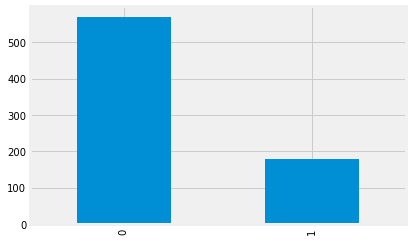

In [16]:
# Plotting donation column 
donated= transf['Donated_Mar_2007']
donated.value_counts(normalize=False).plot(kind='bar')

In [17]:
# Null values: there is non null values. 
transf.isnull().sum()

Recency             0
Frequency           0
Monetary            0
Time                0
Donated_Mar_2007    0
dtype: int64

<AxesSubplot:>

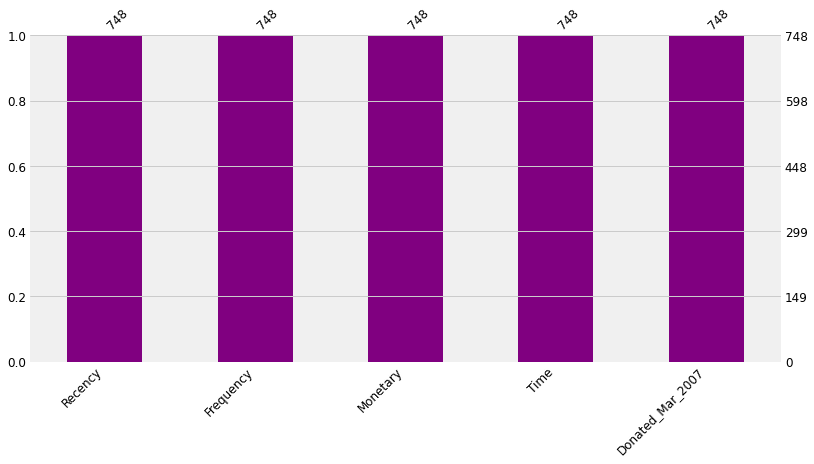

In [18]:
# Missing values: it looks like there are not missing values
import missingno as msno
msno.bar(transf, figsize=(12, 6), fontsize=12, color='purple')

In [19]:
# Checking for missing values using notnull()
# creating a dataframe using dictionary
transf_1 = pd.DataFrame(transf)
  
# using notnull() function 
transf_1.notnull()

,Recency,Frequency,Monetary,Time,Donated_Mar_2007
0,True,True,True,True,True
1,True,True,True,True,True
2,True,True,True,True,True
3,True,True,True,True,True
4,True,True,True,True,True
...,...,...,...,...,...
743,True,True,True,True,True
744,True,True,True,True,True
745,True,True,True,True,True
746,True,True,True,True,True


In [20]:
transf_1.notnull().sum()

# This confirms that there are not not null values

Recency             748
Frequency           748
Monetary            748
Time                748
Donated_Mar_2007    748
dtype: int64

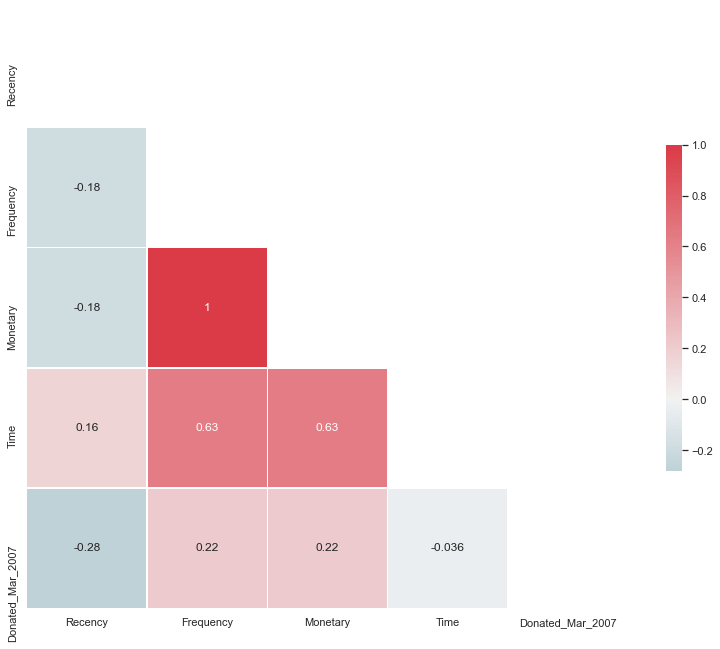

In [21]:
# Heatmap using seaborne to visualise the correlation between the different variables of the dataset. The heatmap is a correlation matrix.
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(transf.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(transf.corr(), mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show();

In [22]:
# The heatmap shows that there is weak to moderate correlations between some of the features.
# 1) moderate positive correlation between frequency (times) vs. quantity (c.c. blood)= 0.63
# 2) weak negative correlation between recency (months) vs. donated in March

# Pandas profiling shows also the highly correlation bewteen Monetary (c.c. blood) and Frequency (times). 

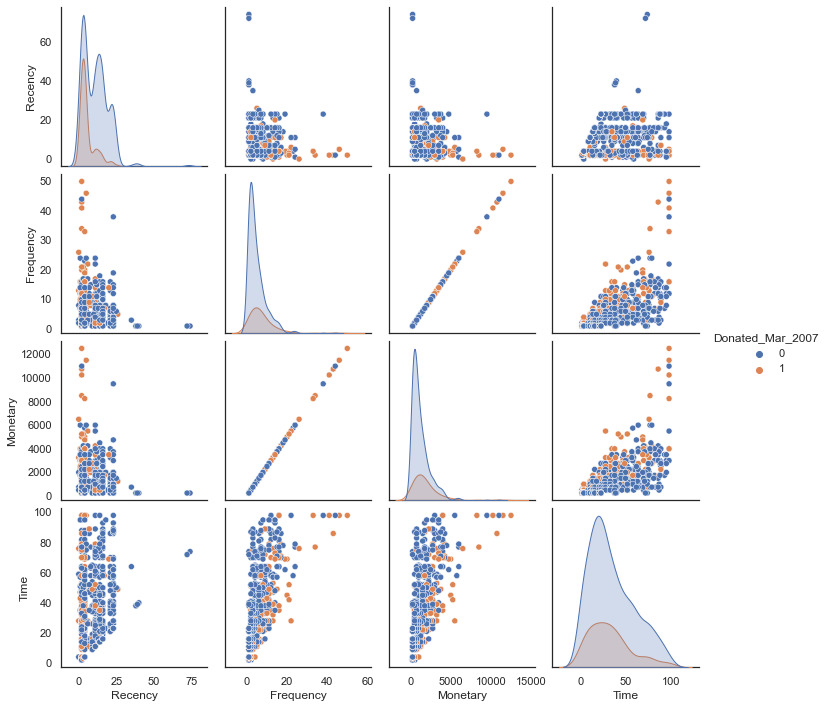

In [23]:
# Pairplot creates a grid of Axes such that each numeric variable in data will by shared across the y-axes across a single row and the x-axes across a single column
# The following pairplot shows the relationship for (n,2) combination of variable in the dataframe based on donating or not on March 2007.
sns.pairplot(transf, hue='Donated_Mar_2007')

#### Univariate analysis: Understanding the dataset features

In [24]:
# Density plot and Histograms of continuous variables of the dataset

In [25]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

C:\Users\Monica\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Recency', ylabel='Density'>

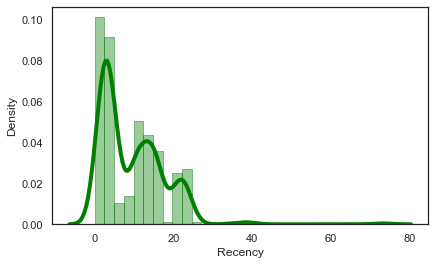

In [26]:
sns.distplot(transf['Recency'], hist=True, kde=True, 
            color='green', hist_kws={'edgecolor':'darkgreen'}, kde_kws={'linewidth':4})

# From the describe table above we know that the minimum recency is 0 months and the maximum 74 months. The density and histogram plot is showing that the feature is multimodal, presenting three different recency peaks but in general not important donations after 2 years.Showing also some outliers.

C:\Users\Monica\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Frequency', ylabel='Density'>

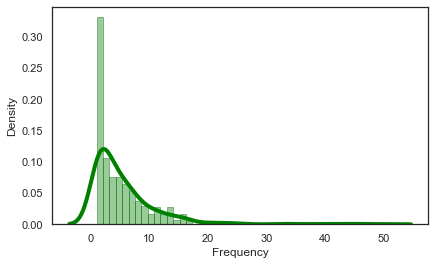

In [27]:
sns.distplot(transf['Frequency'], hist=True, kde=True, 
            color='green', hist_kws={'edgecolor':'darkgreen'}, kde_kws={'linewidth':4})

# From the describe table above we know that the minimum frequency is 1 time and the maximum 50 times. The density and histogram plot is showing a right-skewed shape, with a peak that is left of center and a more gradual tapering to the right side of the graph.This unimodal data and its left peak (1 time donation) is smaller than the median (4 times) and the mean (5 times). The plot also shows some outliers.

C:\Users\Monica\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Monetary', ylabel='Density'>

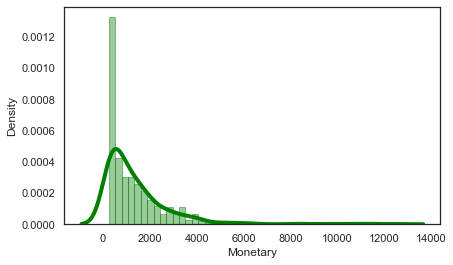

In [28]:
sns.distplot(transf['Monetary'], hist=True, kde=True, 
            color='green', hist_kws={'edgecolor':'darkgreen'}, kde_kws={'linewidth':4})

# From the describe table above we know that the minimum monetary value is 250 cc of blood and the maximum 12500. The density and histogram plot is showing a right-skewed shape, with a peak that is left of center and a more gradual tapering to the right side of the graph.This unimodal data and its left peak is smaller than the median (1000 cc) and the mean (1379 cc). The plot also shows some outliers.

C:\Users\Monica\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Time', ylabel='Density'>

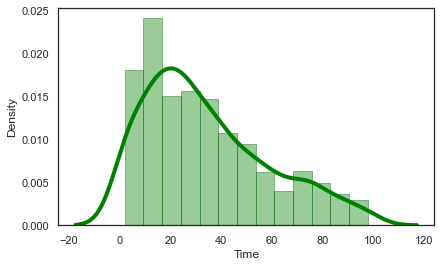

In [29]:
sns.distplot(transf['Time'], hist=True, kde=True, 
            color='green', hist_kws={'edgecolor':'darkgreen'}, kde_kws={'linewidth':4})

# From the describe table above we know that the minimum time is 2 months and the maximum 98 months. The density and histogram plot is showing a slightly right-skewed shape, with a peak around r0 months that is left of center and a more gradual tapering to the right side of the graph.This unimodal data and its left peak is smaller than the median (28 months) and the mean (34 motnhs). The plot also shows some outliers.

C:\Users\Monica\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Donated_Mar_2007', ylabel='Density'>

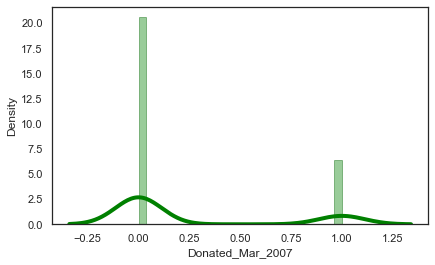

In [30]:
sns.distplot(transf['Donated_Mar_2007'], hist=True, kde=True, 
            color='green', hist_kws={'edgecolor':'darkgreen'}, kde_kws={'linewidth':4})

# The plot shows clearly the bimodal distribution with donation and not donation in March 2007.

<AxesSubplot:xlabel='Recency'>

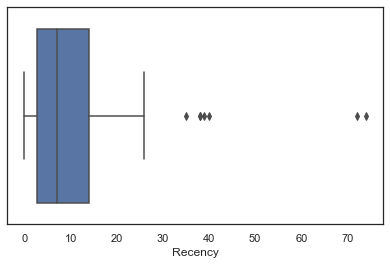

In [31]:
# Discovering Outliers using visualization tools: box plot and scatter plots
sns.boxplot(x=transf['Recency'])

<AxesSubplot:xlabel='Frequency'>

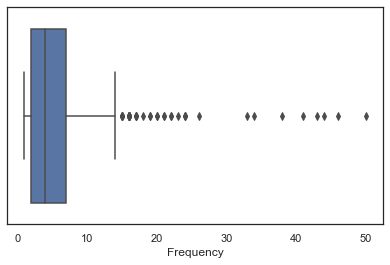

In [32]:
sns.boxplot(x=transf['Frequency'])

<AxesSubplot:xlabel='Monetary'>

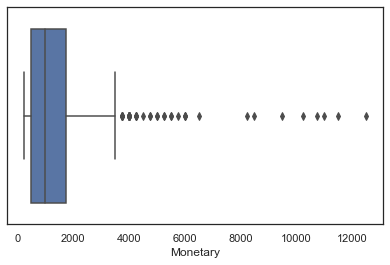

In [33]:
sns.boxplot(x=transf['Monetary'])

<AxesSubplot:xlabel='Time'>

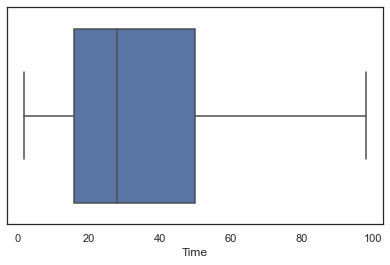

In [34]:
sns.boxplot(x=transf['Time'])

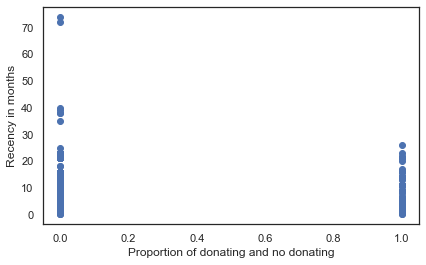

In [35]:
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(transf['Donated_Mar_2007'], transf['Recency'])
ax.set_xlabel('Proportion of donating and no donating')
ax.set_ylabel('Recency in months')
plt.show()

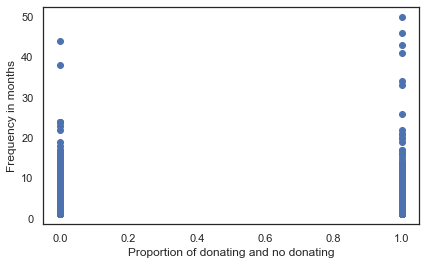

In [36]:
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(transf['Donated_Mar_2007'], transf['Frequency'])
ax.set_xlabel('Proportion of donating and no donating')
ax.set_ylabel('Frequency in months')
plt.show()

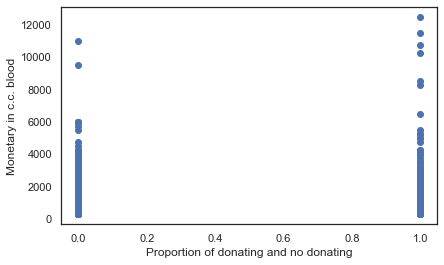

In [37]:
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(transf['Donated_Mar_2007'], transf['Monetary'])
ax.set_xlabel('Proportion of donating and no donating')
ax.set_ylabel('Monetary in c.c. blood')
plt.show()

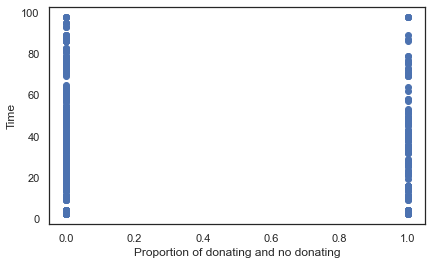

In [38]:
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(transf['Donated_Mar_2007'], transf['Time'])
ax.set_xlabel('Proportion of donating and no donating')
ax.set_ylabel('Time')
plt.show()

# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Normalisation** (if possible or necessary)
    - **Feature Engeneer** (if useful or necessary)

In [39]:
# Create X and y to match Scikit_learn
features = ['Recency','Frequency','Monetary', 'Time']
outcome = 'Donated_Mar_2007'

X = transf[features].copy()
y = transf[outcome] 

In [40]:
X.head()

,Recency,Frequency,Monetary,Time
0,2,50,12500,98
1,0,13,3250,28
2,1,16,4000,35
3,2,20,5000,45
4,1,24,6000,77


In [41]:
y

0      1
1      1
2      1
3      1
4      0
      ..
743    0
744    0
745    0
746    0
747    0
Name: Donated_Mar_2007, Length: 748, dtype: int64

In [42]:
y.unique()

array([1, 0], dtype=int64)

In [43]:
y.value_counts()

0    570
1    178
Name: Donated_Mar_2007, dtype: int64

### 5.1  Scaling and oversampling

In [209]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE

# SPlit data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Oversampling
smote = SMOTE()
X_train_scaled_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

In [210]:
y_train.value_counts(normalize=True)

0    0.764214
1    0.235786
Name: Donated_Mar_2007, dtype: float64

In [211]:
y_train.value_counts(normalize=False)

0    457
1    141
Name: Donated_Mar_2007, dtype: int64

<AxesSubplot:>

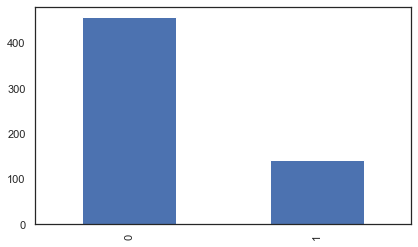

In [212]:
y_train.value_counts(normalize=False).plot(kind='bar')

In [213]:
# Splitted data
print('X_train_scaled_smote shape is ' , X_train_scaled_smote.shape)
print('X_test_scaled shape is ' , X_test_scaled.shape)
print('y_train_smote shape is ' , y_train_smote.shape)
print('y_test shape is ' , y_test.shape)

X_train_scaled_smote shape is  (914, 4)
X_test_scaled shape is  (150, 4)
y_train_smote shape is  (914,)
y_test shape is  (150,)


In [214]:
y_train_smote.value_counts(normalize=True)

1    0.5
0    0.5
Name: Donated_Mar_2007, dtype: float64

In [215]:
y_train_smote.value_counts(normalize=False)

1    457
0    457
Name: Donated_Mar_2007, dtype: int64

<AxesSubplot:>

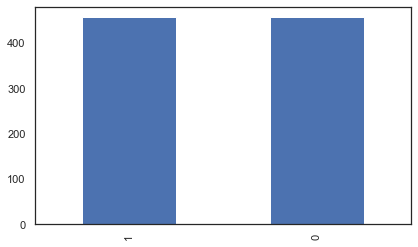

In [216]:
y_train_smote.value_counts(normalize=False).plot(kind='bar')

In [165]:
X_train_scaled_smote.shape

(914, 4)

In [166]:
pd.DataFrame(X_train_scaled_smote, columns=X.columns).head()

,Recency,Frequency,Monetary,Time
0,-0.064493,0.888840,0.888840,0.568234
1,-0.905517,1.054631,1.054631,2.420902
2,-0.665225,2.380960,2.380960,1.373742
3,-0.905517,-0.271698,-0.271698,-0.760855
4,-0.905517,-0.437489,-0.437489,1.695945


# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)?
- Is there an output variable (label)?
- If there is an output variable:
    - What is it?
    - What is its type?
- What type of Modelling is it?
    - [ ] Supervised
    - [ ] Unsupervised 
- What type of Modelling is it?
    - [ ] Regression
    - [ ] Classification (binary) 
    - [ ] Classification (multi-class)
    - [ ] Clustering

In [167]:
# What are the input variables (features)?
# There are four: Recency, Frequency, Monetary, and Time

In [168]:
# Is there an output variable (label)? What is its type?
# Yes, there is an outpout variable: Donated_Mar_2007. The target variable can be classified as categorical; it is numeric but no continuous

In [169]:
# What type of Modelling is it?
# It is Decision Trees, a supervised Machine Learning algorithm.

In [170]:
# What type of Modelling is it?
# Decision threes is a widely and powerful technique used mainly for classfication; in this case binary: donated or no-donated blood in March (1: donated and 0: did not donate blood) 

# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when spliting

In [171]:
# The answers to the above questions are already in the item above. To avoid copying cells the detail info is presented below.

In [172]:
# Number of known cases or observations:
# After oversampling the total number of observations are 1064.

In [173]:
# Define the split in Training/Test or Training/Validation/Test and their proportions
# X_train shape is  (914, 4)
# X_test shape is  (150, 4)
# y_train shape is  (914, 1)
# y_test shape is  (150, 1)

In [174]:
# Check for unbalanced classes and how to keep or avoid it when spliting.
# Before oversampling, the proportion was unbalanced : for donation (1=23%) 447 observations and for no donation (0=77%) 136 observations
# After the proportion is 50% for each and the number of samples: for donated 

# Step 8: Define a Model

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

In [175]:
# The model to be applied is Decision Trees. The target variable is categorical.Therefore the model is Categorical Variable Decision Tree (target YES or NO)
model = DecisionTreeClassifier()
print(model)

DecisionTreeClassifier()


In [176]:
# The hyperparameters for the Decision Tree are: 
# 1) Max depth: This is the maximum number of children nodes that can grow out from the decision tree until the tree is cut off.
# 2) Min samples leaf: This is the minimum number of samples, or data points, that are required to be present in the leaf node. The leaf node is the last node of the tree.

# Step 9: Fit the Model

In [177]:
type(y_test)

pandas.core.series.Series

In [178]:
y_test.unique()

array([0, 1], dtype=int64)

In [179]:
model.fit(X_train_scaled_smote, y_train_smote)

DecisionTreeClassifier()

# Step 10: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- Check for overfitting
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

In [180]:
type(y_test)

pandas.core.series.Series

In [181]:
y_test.dtypes

dtype('int64')

In [182]:
model.score(X_test_scaled, y_test)

0.6333333333333333

In [183]:
y_pred = model.predict(X_test_scaled)

precision_score(y_test, y_pred)

0.30434782608695654

In [184]:
recall_score(y_test, y_pred)

0.3783783783783784

In [185]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.72      0.75       113
           1       0.30      0.38      0.34        37

    accuracy                           0.63       150
   macro avg       0.54      0.55      0.54       150
weighted avg       0.66      0.63      0.65       150



In [186]:
# Confusion matrix
confusion_matrix(y_test, y_pred)

array([[81, 32],
       [23, 14]], dtype=int64)

<AxesSubplot:>

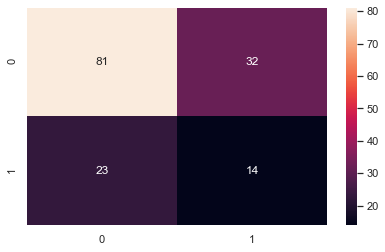

In [187]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt="d")

In [188]:
 from sklearn.exceptions import NotFittedError

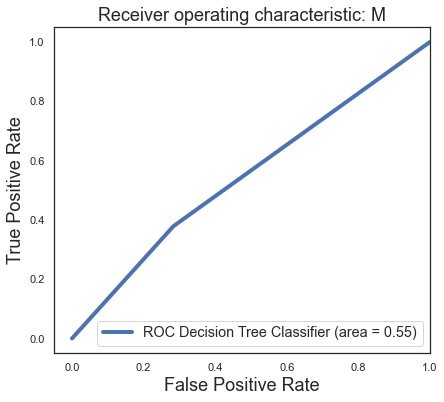

In [191]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc= auc(fpr,tpr)

plt.figure(figsize=[6,6])

plt.plot(fpr, tpr, label='ROC Decision Tree Classifier (area = %0.2f)' % auc(fpr, tpr), linewidth=4)

plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic: M', fontsize=18)
plt.legend(loc="lower right", fontsize='large')
plt.show()

In [197]:
y_train_pred = model.predict(X_train_scaled_smote)

In [192]:
y_train_pred_prob = model.predict_proba(X_train_scaled_smote)[:,1]

In [200]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.72      0.75       113
           1       0.30      0.38      0.34        37

    accuracy                           0.63       150
   macro avg       0.54      0.55      0.54       150
weighted avg       0.66      0.63      0.65       150



In [201]:
model.predict_proba(X_train_scaled_smote)

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [202]:
y_train_pred_prob

array([1.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.15384615, 0.56410256, 0.        , 0.08333333,
       1.        , 0.        , 0.        , 0.56410256, 0.        ,
       0.        , 1.        , 0.42857143, 0.75      , 0.        ,
       0.        , 0.33333333, 0.5       , 0.        , 0.5       ,
       0.        , 0.        , 0.        , 0.6       , 0.        ,
       0.5       , 1.        , 0.        , 0.14814815, 0.        ,
       0.        , 0.14814815, 0.        , 0.        , 0.5       ,
       0.        , 0.5       , 0.07142857, 0.5       , 0.        ,
       0.5       , 0.        , 0.        , 1.        , 0.        ,
       0.08333333, 0.        , 0.42857143, 0.15384615, 0.        ,
       1.        , 0.375     , 0.        , 0.15384615, 1.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ,
       1.        , 0.56410256, 0.15384615, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.56410

# Step 11: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

In [203]:
y_test_pred = model.predict(X_test_scaled)

In [204]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.78      0.72      0.75       113
           1       0.30      0.38      0.34        37

    accuracy                           0.63       150
   macro avg       0.54      0.55      0.54       150
weighted avg       0.66      0.63      0.65       150



In [205]:
y_test_pred_prob = model.predict_proba(X_test_scaled)[:,1]                                                     

# Step 12: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions

In [ ]:
# visualisation of trees: can get errors. Better to do it on R not in python. 
# Hyperparameter tunning. 



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



